<a href="https://colab.research.google.com/github/hawkinsgay/Deep_Learning_Playgroud/blob/main/CNN_Model_HCG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MINST Model with Tensorflow


In [ ]:
# Importing Libraries and Datasets
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image 

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
# Checking versions
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [ ]:
# Loading the MINST dataset from openml
mnist = fetch_openml('mnist_784', cache=False)

In [ ]:
mnist.data.shape

(70000, 784)

In [ ]:
# Setting up data (X) and targets (y) 
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

In [ ]:
# Looking at the flattened image format: 
print(X[9])
arr_pic = X[9]

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0. 189. 190.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 143. 247. 153.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 136. 247. 242.  86.   0.   0.   0.   0.
   0. 

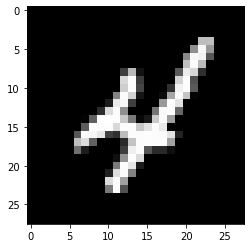

In [ ]:
# reshaping the image with .reshape and printing the pixelated digit 
plt.imshow(arr_pic.reshape(28,28), cmap='gray')

## Building the CNN Architecture:
Convolutional layers

In [ ]:
# Using Tensorflow Sequential()
model = models.Sequential()
model.add(layers.Conv2D(28, (1, 1), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(56, (1, 1), activation='relu'))

In [ ]:
# Checking convolutional summary :
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        1624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 56)          3192      
Total params: 4,872
Trainable params: 4,872
Non-trainable params: 0
_________________________________________________________________


Dense Layers

In [ ]:
# Adding dense layers to model 
model.add(layers.Flatten())
model.add(layers.Dense(56, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        56        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        1624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 56)          3192      
_________________________________________________________________
flatten (Flatten)            (None, 2744)              0         
_________________________________________________________________
dense (Dense)                (None, 56)                1

In [ ]:
# Compiling the modesl with common loss functions and optimizers for image classification
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# Reshaping the the dataset to fit into the CNN
X_reshape = X.reshape(X.shape[0], 28, 28, 1)

# Breaking up the training and testing dataset: 
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y, test_size=0.10, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
X_train.shape, y_train.shape, X_val.shape, X_test.shape

((50400, 28, 28, 1), (50400,), (12600, 28, 28, 1), (7000, 28, 28, 1))

In [ ]:
# Training the model: 
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
1575/1575 [==============================] - 68s 43ms/step - loss: 1.0445 - accuracy: 0.7466 - val_loss: 0.3600 - val_accuracy: 0.8852
Epoch 2/10
1575/1575 [==============================] - 66s 42ms/step - loss: 0.3496 - accuracy: 0.8876 - val_loss: 0.2955 - val_accuracy: 0.9056
Epoch 3/10
1575/1575 [==============================] - 67s 42ms/step - loss: 0.3028 - accuracy: 0.9028 - val_loss: 0.2824 - val_accuracy: 0.9063
Epoch 4/10
1575/1575 [==============================] - 72s 46ms/step - loss: 0.2779 - accuracy: 0.9101 - val_loss: 0.2653 - val_accuracy: 0.9148
Epoch 5/10
1575/1575 [==============================] - 68s 43ms/step - loss: 0.2518 - accuracy: 0.9187 - val_loss: 0.2522 - val_accuracy: 0.9187
Epoch 6/10
1575/1575 [==============================] - 67s 43ms/step - loss: 0.2418 - accuracy: 0.9222 - val_loss: 0.2505 - val_accuracy: 0.9185
Epoch 7/10
1575/1575 [==============================] - 66s 42ms/step - loss: 0.2315 - accuracy: 0.9226 - val_loss: 0.2471 -

## Evaluating the model 


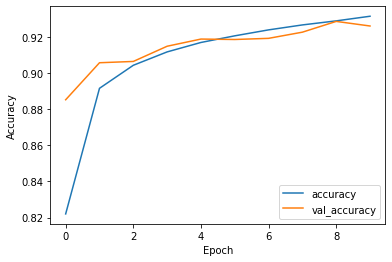

In [ ]:
# Plot training and validation set accuracies
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')


In [ ]:
# Evaluate the model with the testing data:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


219/219 - 4s - loss: 0.2319 - accuracy: 0.9294


In [ ]:
# Print overal accuracy of the model 
print(test_acc*100)

92.94285774230957


## Using the model to make predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


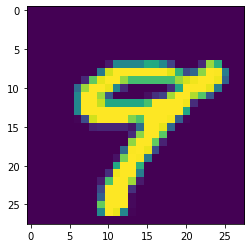

Actual label is : 9
Predicted Label is : 9


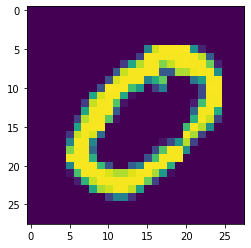

Actual label is : 0
Predicted Label is : 0


In [ ]:
# Random image selection Number 1
image_ind = np.random.randint(0, X_test.shape[0])
pred = model.predict(X_test[image_ind].reshape(1, 28, 28, 1)).tolist()[0]

# Look at the data and the labels - both original and onehot encoded labels
plt.imshow(X_test[image_ind].reshape([28, 28]))
plt.show()
print("Actual label is :", y_test[image_ind])
print("Predicted Label is :", pred.index(max(pred)))

# Random image selection Number 2
image_ind = np.random.randint(0, X_test.shape[0])
pred = model.predict(X_test[image_ind].reshape(1, 28, 28, 1)).tolist()[0]

# Look at the data and the labels - both original and onehot encoded labels
plt.imshow(X_test[image_ind].reshape([28, 28]))
plt.show()
print("Actual label is :", y_test[image_ind])
print("Predicted Label is :", pred.index(max(pred)))